In [1]:
## importing all the required libraries to perform the classification task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing the nltk library to remove the stop words
import nltk
from nltk.corpus import stopwords

In [3]:
## assigning the the columns to a variable yelptrainx
yelptrainx = pd.read_csv('yelpmultilabelX.csv')

In [4]:
## assiging the labels to a variable yelptrainy
yelptrainy = pd.read_csv('yelpmultilabelY.csv')

In [5]:
##assigning the text reviews to X
X = yelptrainx['text']

In [6]:
##shape of yelptrainx
yelptrainx.shape

(4645, 10)

In [7]:
## shape of yelptrainy
yelptrainy.shape

(4645, 4)

In [8]:
## printing the first few rows of yelptrainx
yelptrainx.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,#NAME?,12/13/2007,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
2,zp713qNhx8d9KCJJnrw1xA,2/12/2010,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
3,supigcPNO9IKo6olaTNV-g,10/12/2008,HXP_0Ul-FCmA4f-k9CqvaQ,3,We went here on a Saturday afternoon and this ...,review,SBbftLzfYYKItOMFwOTIJg,3,4,2
4,8FNO4D3eozpIjj0k3q5Zbg,10/8/2008,MuqugTuR5DdIPcZ2IVP3aQ,3,DVAP....\n\nYou have to go at least once in yo...,review,C6IOtaaYdLIT5fWd7ZYIuA,2,4,1


In [9]:
## information of yelptrainx variable
yelptrainx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 10 columns):
business_id    4645 non-null object
date           4645 non-null object
review_id      4645 non-null object
stars          4645 non-null int64
text           4645 non-null object
type           4645 non-null object
user_id        4645 non-null object
cool           4645 non-null int64
useful         4645 non-null int64
funny          4645 non-null int64
dtypes: int64(4), object(6)
memory usage: 363.0+ KB


In [10]:
## information of yelptrainy variable
yelptrainy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 4 columns):
food          4645 non-null int64
service       4645 non-null int64
ambience      4645 non-null int64
worthiness    4645 non-null int64
dtypes: int64(4)
memory usage: 145.2 KB


In [11]:
## getting the count,mean,std,min,25%,50%,75% and max value in the yelptrainx variable
yelptrainx.describe()

,stars,cool,useful,funny
count,4645.000000,4645.000000,4645.000000,4645.000000
mean,3.707858,0.879010,1.463509,0.683315
std,1.207264,1.943097,2.275826,1.927026
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,38.000000,38.000000,57.000000


In [12]:
## getting the count,mean,std,min,25%,50%,75% and max value in the yelptrainy variable
yelptrainy.describe()

,food,service,ambience,worthiness
count,4645.000000,4645.000000,4645.000000,4645.000000
mean,0.875780,0.350269,0.245856,0.094510
std,0.329867,0.477106,0.430640,0.292569
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [13]:
## To get an insight on the length of each review, we can create a new column called text length
yelptrainx['text length'] = yelptrainx['text'].apply(len)

In [14]:
## viewing the yelptrainx along with the text length 
yelptrainx.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,#NAME?,12/13/2007,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
2,zp713qNhx8d9KCJJnrw1xA,2/12/2010,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
3,supigcPNO9IKo6olaTNV-g,10/12/2008,HXP_0Ul-FCmA4f-k9CqvaQ,3,We went here on a Saturday afternoon and this ...,review,SBbftLzfYYKItOMFwOTIJg,3,4,2,1469
4,8FNO4D3eozpIjj0k3q5Zbg,10/8/2008,MuqugTuR5DdIPcZ2IVP3aQ,3,DVAP....\n\nYou have to go at least once in yo...,review,C6IOtaaYdLIT5fWd7ZYIuA,2,4,1,565


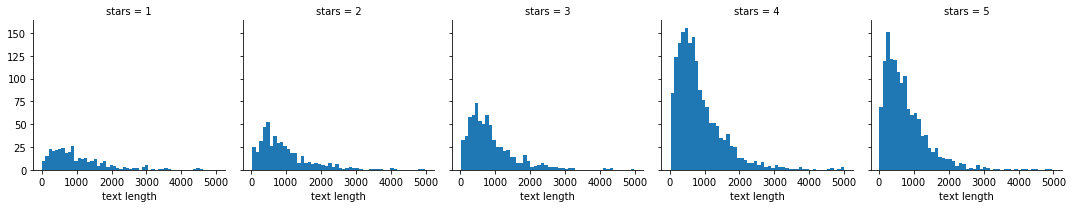

In [15]:
## FacetGrid to see if there’s any relationship between newly created text length feature and the stars rating.
g = sns.FacetGrid(data=yelptrainx, col='stars')
g.map(plt.hist, 'text length', bins=50)

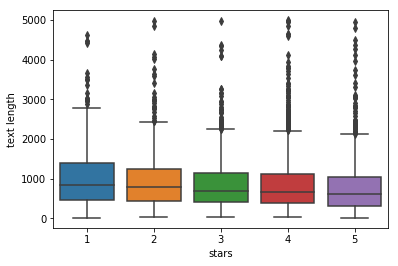

In [16]:
## creating a box plot of the text length for each star rating
sns.boxplot(x='stars', y='text length', data=yelptrainx)

In [17]:
## grouping the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny.
stars = yelptrainx.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.675427,-0.822523,-0.914412
useful,-0.675427,1.000000,0.969149,0.845332
funny,-0.822523,0.969149,1.000000,0.919426
text length,-0.914412,0.845332,0.919426,1.000000


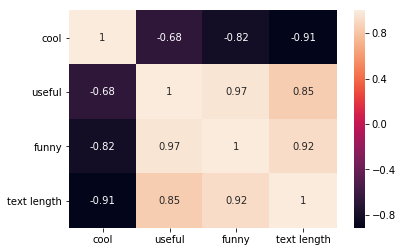

In [18]:
## visualizing these correlations
sns.heatmap(data=stars.corr(), annot=True)


In [19]:
## Function to remove punctuations and stop words from each of the review
import string
def text_process(text):
        nopunc = [char for char in text if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
## importing count vectorizer to convert the list of tokens obtained from the above text_process function
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
## an instance is fitted to convert all the text reviews into vector format
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [22]:
## size of the vocabulary stored in the vetorizer
len(bow_transformer.vocabulary_)

29725

In [23]:
## transforming our X dataframe into a sparse matrix
X = bow_transformer.transform(X)

In [24]:
## shape of new X
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (4645, 29725)
Amount of Non-Zero occurrences:  321139
Density: 0.23258701715854246


In [25]:
## importing train test split
from sklearn.model_selection import train_test_split

In [26]:
## assingning the yelptrainy to variable y
y=yelptrainy

In [27]:
## splitting the X and y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
## importing a multilabel classifier chain library 
from skmultilearn.problem_transform import ClassifierChain

In [31]:
## import gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

In [32]:
## building a classifier using Gaussian NB in Classifier Chain
classifier = ClassifierChain(GaussianNB())

In [33]:
##fitting the classifier
classifier.fit(X_train, y_train)

ClassifierChain(classifier=GaussianNB(priors=None),
        require_dense=[True, True])

In [34]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [35]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.302475780409042

In [36]:
## import KNN
from sklearn.neighbors import KNeighborsClassifier

In [37]:
## building a classifier using KNN in Classifier Chain
classifier = ClassifierChain(KNeighborsClassifier())

In [38]:
##fitting the classifier
classifier.fit(X_train, y_train)

ClassifierChain(classifier=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
        require_dense=[True, True])

In [39]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [40]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5145317545748116

In [41]:
## import Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [42]:
## building a classifier using Multinomial Naive Bayes in Classifier chain
classifier = ClassifierChain(MultinomialNB())

In [43]:
##fitting the classifier
classifier.fit(X_train, y_train)

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        require_dense=[True, True])

In [44]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [45]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5672766415500539

In [30]:
## import Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
## building a classifier using Decision Tree
classifier=DecisionTreeClassifier(random_state=0)

In [48]:
## using cross validation
from sklearn.model_selection import cross_val_score

scores=cross_val_score(classifier,X_train,y_train, cv=10)

In [49]:
## accuracy from cross validation
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.915 (std: 0.013)



In [50]:
## importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
## building a classifier using Random Forest Classifier in classifier chain
classifier = ClassifierChain(RandomForestClassifier())

In [52]:
##fitting the classifier
classifier.fit(X_train, y_train)

ClassifierChain(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        require_dense=[True, True])

In [53]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [54]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
accuracy_score(y_test,predictions)

0.689989235737352

In [31]:
## building a classifier using Deciscion tree using classifier chain
classifier = ClassifierChain(DecisionTreeClassifier())

In [32]:
##fitting the classifier
classifier.fit(X_train, y_train)

ClassifierChain(classifier=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        require_dense=[True, True])

In [34]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [58]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
accuracy_score(y_test,predictions)

0.9677072120559742

In [59]:
## import Linear SVC
from sklearn.svm import LinearSVC

In [60]:
## building a classifier using Linear SVC Classifier in classifier chain
classifier = ClassifierChain(LinearSVC())

In [61]:
## fitting the classifier
classifier.fit(X_train, y_train)

ClassifierChain(classifier=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        require_dense=[True, True])

In [62]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [63]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
accuracy_score(y_test,predictions)

0.9311087190527448

In [64]:
## import Extra tree classifier
from sklearn.tree import ExtraTreeClassifier

In [66]:
## building a classifier using Extra tree Classifier in Binary Relevance
classifier = ClassifierChain(ExtraTreeClassifier())

In [67]:
## fitting the classifier
classifier.fit(X_train, y_train)

ClassifierChain(classifier=ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random'),
        require_dense=[True, True])

In [68]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [69]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
accuracy_score(y_test,predictions)

0.5457481162540366

In [70]:
## fitting the extra trees classifier in classifier chain and predicting the label and determining the accuracy
from sklearn.ensemble import ExtraTreesClassifier

classifier = ClassifierChain(ExtraTreesClassifier())

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.5371367061356297

In [18]:
## fitting the MLP classifier in classifier chain and predicting the label and determining the accuracy
from sklearn.neural_network import MLPClassifier
classifier = ClassifierChain(MLPClassifier())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5888051668460711